# Retrieving track data from fastf1 library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

In [9]:
session = fastf1.get_session(2025, 'Australia', 'FP1')
session.load(telemetry=False)

laps = session.laps

all_weather = []

for lap_index, lap in laps.iterlaps():
    weather = lap.get_weather_data()
    
    all_weather.append(weather)

weather_df = pd.DataFrame(all_weather)
weather_df

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
15,0 days 00:15:44.766000,24.5,50.0,1018.2,False,40.0,129,0.8
17,0 days 00:17:44.769000,24.6,50.0,1018.2,False,40.4,0,1.0
18,0 days 00:18:44.792000,24.7,50.0,1018.2,False,40.7,243,0.4
21,0 days 00:21:44.771000,24.5,47.0,1018.3,False,41.4,157,0.9
22,0 days 00:22:44.795000,24.5,47.0,1018.4,False,41.2,219,1.1
...,...,...,...,...,...,...,...,...
27,0 days 00:27:44.847000,24.8,46.0,1018.2,False,41.3,185,0.8
29,0 days 00:29:44.848000,24.8,46.0,1018.3,False,41.5,127,0.5
31,0 days 00:31:44.860000,24.8,45.0,1018.3,False,41.8,139,1.0
49,0 days 00:49:45.019000,24.3,48.0,1018.2,False,42.5,0,0.7


In [10]:
weather_df = weather_df.drop(columns=['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'WindDirection', 'WindSpeed'])

In [11]:
weather_df.head()

,Time,TrackTemp
15,0 days 00:15:44.766000,40.0
17,0 days 00:17:44.769000,40.4
18,0 days 00:18:44.792000,40.7
21,0 days 00:21:44.771000,41.4
22,0 days 00:22:44.795000,41.2


In [14]:
weather_df.to_csv('weather_data.csv', index=False)

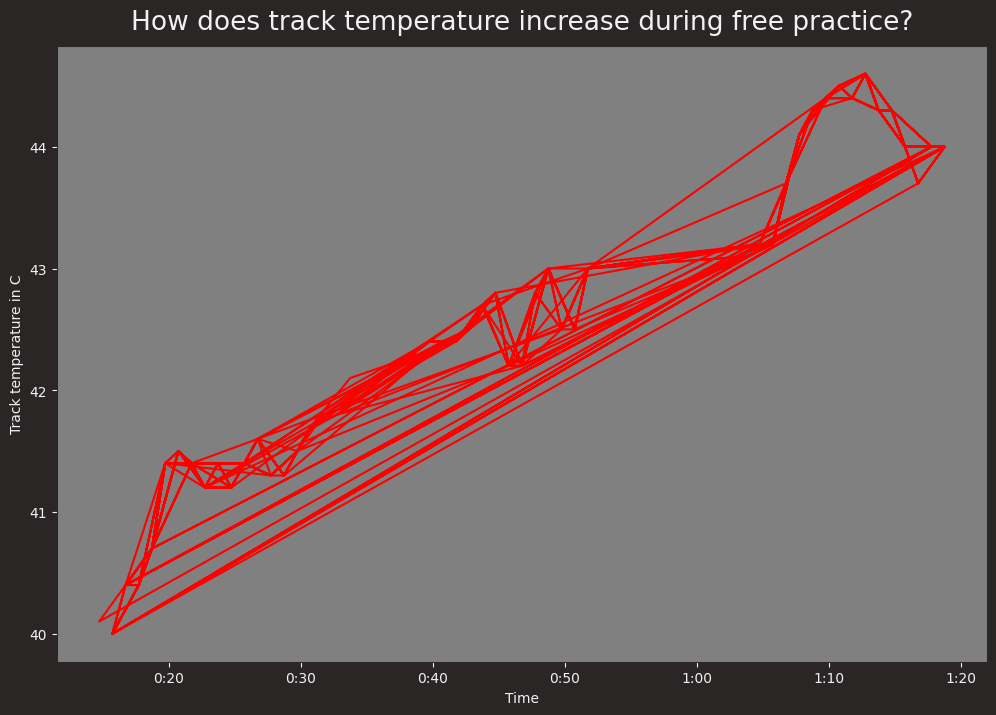

In [26]:
from fastf1 import plotting

fig, ax = plt.subplots(figsize=(12,8))


ax.plot(weather_df['Time'], weather_df['TrackTemp'], color='red')
ax.set_facecolor('grey')
ax.set_xlabel('Time')
ax.set_ylabel('Track temperature in C')
ax.set_title('How does track temperature increase during free practice?')
plt.savefig('track_temp.png')